In [1]:
#IMPORTS 
import numpy as np
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function
from mayavi import mlab
from tqdm import tqdm
from skimage.transform import resize, rescale
from skimage.morphology import label

#IMPORT OWN FILES
import sys
sys.path.append(r"Code") # append folder "/Code" to our path"

import molecules as mc
import img3dto2d as i32
import util
import video_format as vf
import stats as st

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



## Overview of various runs

In [2]:
#example runs:
#259 molecules (4000,4000) stepsize 1 - not much happens - simV3R_1000_4000_214142_1_1000_1bd67.npy


#vol frac 13% max runs different stepsizes:
# 3 - simV3R_500_8000_1414_3_1000_de453.npy -
# 5 - simV3R_500_8000_1414_5_1000_7c3ec.npy - 
# 7 - simV3R_500_8000_1417_7_1000_239bb.npy -
# 9 - simV3R_500_8000_1416_9_1000_8c033.npy -
# 11 - simV3R_500_8000_1417_11_1000_eac74.npy
# 13 - simV3R_500_8000_1417_13_1000_89237.npy - 0.34

#vol frac 6% max runs different stepsizes 500_000 - some coagulation, but not giga clear
# 3 - simV3R_500_8000_1414_3_1000_cf794.npy
# 5 - simV3R_500_8000_1414_5_1000_c291e.npy
# 7 - simV3R_500_8000_1414_7_1000_cae27.npy

#vol frac 6% 1_000_000
# 5 - simV3R_1000_8000_1416_5_1000_9907c.npy - could run longer?
# 7 - simV3R_1000_8000_1416_7_1000_f1c26.npy - looks prty good ("full coag at 950k")
# 9 - simV3R_1000_8000_1416_9_1000_caa13.npy - good koag around 800k
# 1417 (0.1cleave) - simV3R_1000_8000_1417_7_1000_dc780.npy - 900k

#vol frac 6% 1_000_000 4k
# 9 - simV3R_1000_4000_1417_9_1000_d104d.npy - fully coagulated (dip at 250k)


#vol frac 13% 5k 1_000_000
#1417 3 - simV3R_1000_5000_1417_3_1000_d44f4.npy - 850k
#1417 5 - simV3R_1000_5000_1417_5_1000_d1021.npy - 300k

#long runs
# 6%  ss9 - simV3R_2000_8000_1415_9_1000_c0bf3.npy
# 13% ss9 - simV3R_1000_8000_1229_9_1000_c9da4.npy


#vol frac 6% 8k 1_000_000 (different seeds) ss7
# 1416 - simV3R_1000_8000_1416_7_1000_f1c26.npy - 950k
# 1417 - simV3R_1000_8000_1417_7_1000_b524f.npy - not 75%
# 1418 - simV3R_1000_8000_1418_7_1000_abb9a.npy - not 75%
# 1419 - simV3R_1000_8000_1419_7_1000_12f31.npy - not 75%
# 1224 - simV3R_1000_8000_1224_7_1000_4c9ba.npy
# 1225 - simV3R_1000_8000_1225_7_1000_b7297.npy
# 1226 - simV3R_1000_8000_1226_7_1000_d3e64.npy


#vol frac 6% 8k 1_000_000 (different seeds) ss9
# 1415 - simV3R_1000_8000_1415_9_1000_8a26c.npy
# 1416 - simV3R_1000_8000_1416_9_1000_caa13.npy
# 1417 - simV3R_1000_8000_1417_9_1000_51b69.npy
# 1418 - simV3R_1000_8000_1418_9_1000_8f6da.npy
# 1224 - simV3R_1000_8000_1224_9_1000_89542.npy
# 1225 - simV3R_1000_8000_1225_9_1000_4bf88.npy
# 1226 - simV3R_1000_8000_1226_9_1000_87fcf.npy
# 1227 - simV3R_1000_8000_1227_9_1000_8b297.npy
# 1228 - simV3R_1000_8000_1228_9_1000_dcaf9.npy
# 1229 - simV3R_1000_8000_1229_9_1000_8d936.npy


#vol frac 13% 5k 1_000_000 ss=3
# 1413 - simV3R_1000_5000_1413_3_1000_bb994.npy
# 1415 - simV3R_1000_5000_1415_3_1000_58d72.npy
# 1416 - simV3R_1000_5000_1416_3_1000_83404.npy
# 1417 - simV3R_1000_5000_1417_3_1000_d44f4.npy
# 1224 - simV3R_1000_5000_1224_3_1000_ba50f.npy
# 1225 - simV3R_1000_5000_1225_3_1000_34f45.npy
# 1227 - simV3R_1000_5000_1227_3_1000_06c6c.npy
# 1227 2 - simV3R_1000_5000_1227_3_1000_47094.npy
# 1230 - simV3R_1000_5000_1230_3_1000_0eaf2.npy
# 1228 - simV3R_1000_5000_1228_3_1000_cfb5d.npy
# 1229 - simV3R_1000_5000_1229_3_1000_5eab6.npy

#vol frac 13% 8k 500_000 ss=9
# 1416 - simV3R_500_8000_1416_9_1000_8c033.npy -
# 1417 - simV3R_500_8000_1417_9_1000_21956.npy
# 1420 - simV3R_500_8000_1420_9_1000_70849.npy
# 1226 - simV3R_500_8000_1226_9_1000_55d8d.npy
# 1229 - simV3R_500_8000_1229_9_1000_b241f.npy
# 1230 - simV3R_500_8000_1230_9_1000_81d2c.npy
# 1237 - simV3R_500_8000_1237_9_1000_5fa38.npy
# 1239 - simV3R_500_8000_1239_9_1000_46f8b.npy
# 1245 - simV3R_500_8000_1245_9_1000_f8fad.npy
# 1261 - simV3R_500_8000_1261_9_1000_94f87.npy


#vol frac 6% 

# ---- no coagulation examples (sigma = .006) ----

#13% 4k
# simV3R_1000_4000_1417_3_1000_85d2c.npy

#6% 4k
# simV3R_1000_4000_1417_9_1000_e5c50.npy


# ---- tests to find clear coagulation visualisation ---
#vol frac 6% 4000, 500_000:
#5 - simV3R_500_4000_214142_5_1000_f95f1.npy - viser godt koagulation

#vol frac 3% 4000, 500_000:
# 5 - simV3R_500_4000_214142_5_1000_75dfb.npy - meget koagulation





#example tests for Coagulation:
#65 mols, (4000,4000) ss = 9 ,100_000- images show clearer coagulation  - simV3R_100_4000_214142_9_1000_75c57.npy
#65 4000 200_00 5 - 0.06  -simV3R_200_3000_214142_5_1000_66d8a.npy

#65 2500 200_000 5 0.10 - coagulation ikke helt så god - simV3R_200_2500_214142_5_1000_72d01.npy

## Load a specific run

In [3]:
# load radius and all molecule positions
filename = r"Data\6P\simV3R_1000_8000_1224_9_1000_89542.npy" # name, num frames saved, boxsize x and y, seed, stepsize, frames skiped, uniqe chars
filename_split = filename.split("_")
points, radii, acc = mc.load_molecule_steps(filename)

#sim values:
num_frames = int(filename_split[1]) #can be stored at eg. 100 steps pr frame (to save space)
num_molecules = len(points[0])
size_const = int(filename_split[2])
seed = int(filename_split[3])
max_stepsize =  int(filename_split[4])
skip_frames = int(filename_split[5])
box_size = np.array([size_const,size_const,1000]) #may need to set the z value to differently

#image values
image_size = np.array([size_const,size_const])
sigma_smooth = 175 #gauss smoothing

frames = [0,len(points) - 1] #select frames to plot
print("total frames", num_frames * skip_frames, "stored frames:" , num_frames, "molecules:",  num_molecules ," image size:", image_size , "seed:",seed, "max stepsize:",max_stepsize)
print("acc mean:", np.mean(acc))

#volume fraciton:
box_vol = int(box_size[0])*int(box_size[1])*int(box_size[2])
sphere_vol = 0
for r in radii:
  sphere_vol += ((4/3)*r**3*np.pi)

print("Density: ", sphere_vol/box_vol)

total frames 1000000 stored frames: 1000 molecules: 479  image size: [8000 8000] seed: 1224 max stepsize: 9
acc mean: 0.391827
Density:  0.06298836026253886


In [4]:
#plots:
projections = True#False#
radius_plot = True#False#
post_process = True#False#

#animation:
animate =  True#False#

#stats:
stats =True #False #
avg_dist_stats = False#True#
overlap_stats = False #True#
avg_kdist_stats =True#False#
rate_stats = True#False#

#video  & rsm
rsm = True #False#
video = True#False#

## Projection and smoothing

0it [00:00, ?it/s]

2it [01:27, 43.87s/it]


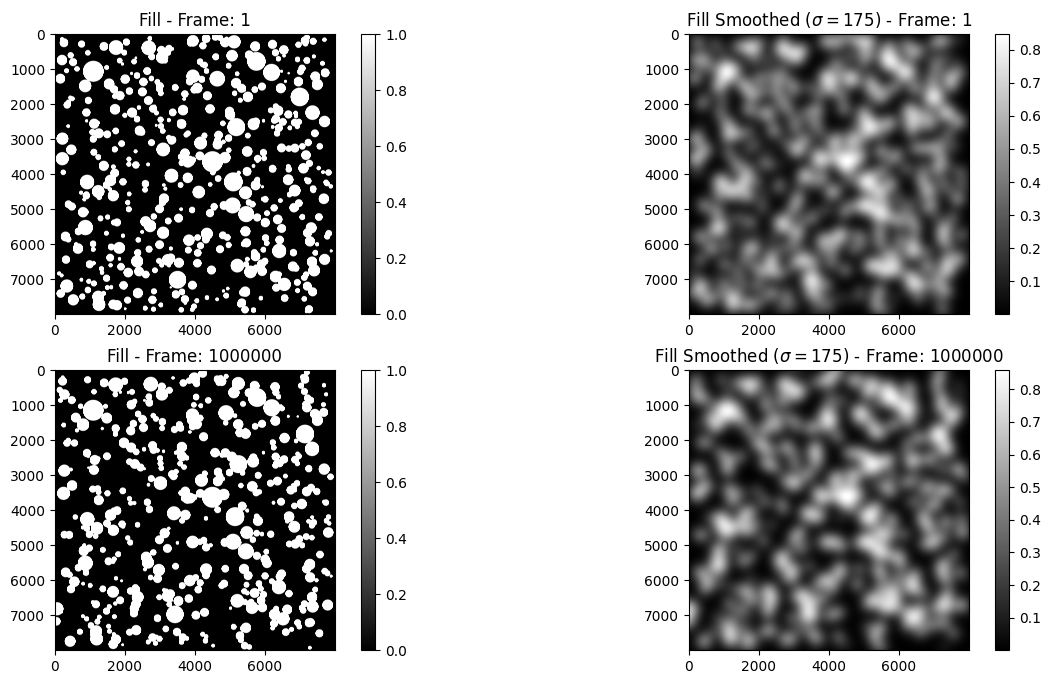

In [5]:
imgs_fill = []
imgs_fill_smooth = []
num_cols = 2

if projections:
  #plot frames

  plt.figure(figsize=(15,4*len(frames)))
  for i,f in tqdm(enumerate(frames)):
    
    _p2dr = list(zip(np.array(points[f])[:,:2],radii)) # all depths

    _frame_val = f #this conversion probably works best for first and last frame (may need the verify)
    if f == 0:
      _frame_val = 1
    else:
      _frame_val = (_frame_val + 1) * skip_frames

    #Hard fill
    plt.subplot(len(frames),num_cols,(i)*num_cols+1)
    plt.title(f"Fill - Frame: {_frame_val}")
    _img_fill = i32.get_3d_to_2d_img(_p2dr,image_size)

    im_ratio = _img_fill.shape[0]/_img_fill.shape[1]
    plt.imshow(_img_fill,cmap="gray")
    plt.colorbar(fraction=0.045 * im_ratio)


    #gauss on hard fill:
    plt.subplot(len(frames),num_cols,(i)*num_cols+2)
    plt.title(f"Fill Smoothed ($\sigma =${sigma_smooth}) - Frame: {_frame_val}")
    _img_smooth = i32.gauss2dimg(_img_fill,sigma_smooth)
    plt.imshow(_img_smooth,cmap="gray")
    plt.colorbar(fraction=0.045 * im_ratio)

    imgs_fill.append(_img_fill)
    imgs_fill_smooth.append(_img_smooth)

  plt.show()

## Radius distibution

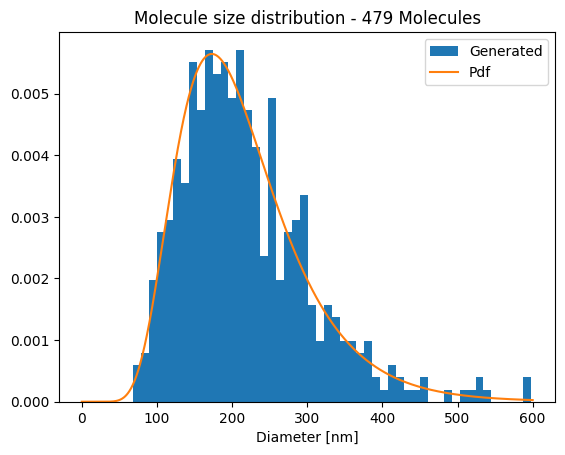

In [6]:
#radius distribution
if radius_plot:
  x = np.linspace(0.1,600, 1000)
  res = [util.pdf(i) for i in x]

  plt.figure()
  plt.hist(radii * 2,bins = 50, density = True,label="Generated")
  plt.plot(x,res,label="Pdf")
  plt.title(f"Molecule size distribution - {num_molecules} Molecules")
  plt.legend()
  plt.xlabel("Diameter [nm]")
  plt.show()

## Simulation stats

100%|██████████| 100/100 [00:43<00:00,  2.30it/s]


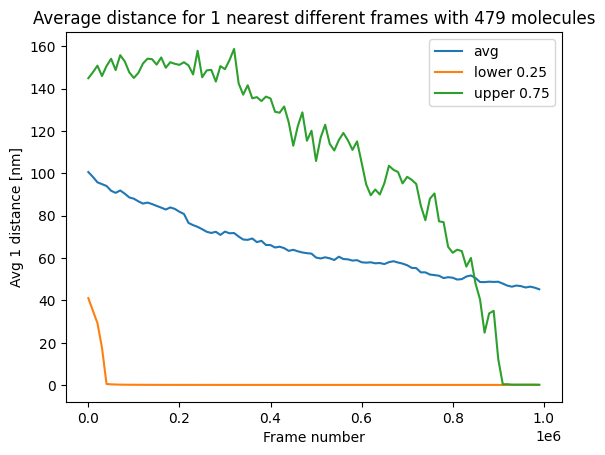

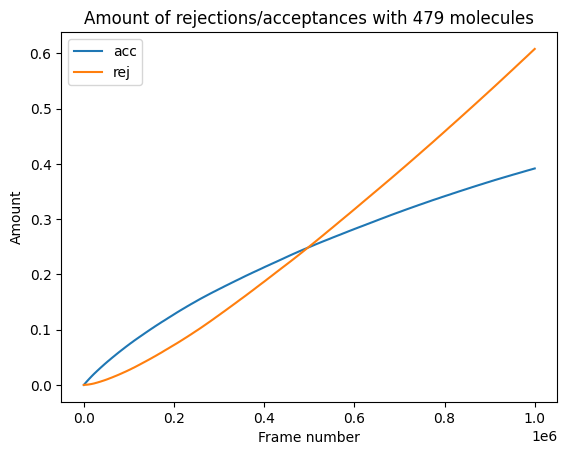

In [7]:
skip_stats = 10
frame_nums = [x for x in range(0,num_frames,skip_stats)]
frame_nums_text = [x*skip_frames for x in range(0,num_frames,skip_stats)]
points_skiped = [points[x] for x in frame_nums]

if stats:
  if avg_dist_stats:
    avg_dists = st.avg_dist(points_skiped,radii)
    #plot avg distance
    plt.plot(frame_nums_text,avg_dists)
    plt.title(f"Average distance for different frames with {num_molecules} molecules")
    plt.xlabel("Frame number")
    plt.ylabel("Avg distance [nm]")
    plt.show()
  
  if overlap_stats:
    overlaps = st.check_for_overlap(points_skiped, radii)

    #plot avg distance
    plt.plot(frame_nums_text,overlaps)
    plt.title(f"Overlaps with {num_molecules} molecules")
    plt.xlabel("Frame number")
    plt.ylabel("Amount")
    plt.show()

  if avg_kdist_stats:
    k = 1
    upper = 0.75
    lower = 0.25
    k_dists,k_lower,k_upper = st.avg_k_dist(points_skiped,radii,k,upper=upper,lower=lower)

    #plot avg distance
    plt.plot(frame_nums_text,k_dists,label=f"avg")
    plt.plot(frame_nums_text,k_lower,label=f"lower {lower}")
    plt.plot(frame_nums_text,k_upper,label=f"upper {upper}")
    plt.title(f"Average distance for {k} nearest different frames with {num_molecules} molecules")
    plt.xlabel("Frame number")
    plt.ylabel(f"Avg {k} distance [nm]")
    plt.legend()
    plt.show()

  if rate_stats:
    acceptances, rejections = st.mc_rate(acc)

    #plot acceptance and rejectance 
    plt.plot(acceptances,label="acc")
    plt.plot(rejections,label="rej")
    plt.title(f"Amount of rejections/acceptances with {num_molecules} molecules")
    plt.xlabel("Frame number")
    plt.ylabel("Amount")
    plt.legend()
    plt.show()


## Animation

In [8]:
#mayavi visualize

if animate:

	xs = np.array([inner_list[0] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
	ys = np.array([inner_list[1] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
	zs = np.array([inner_list[2] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
	mlab.clf()
	#mlab.points3d(0,0,0)

	plt2 = mlab.points3d(points[0][:, 0], points[0][:, 1], points[0][:, 2], radii*2, resolution = 10, scale_mode = "scalar", scale_factor = 1)
	mlab.axes(extent = [0,box_size[0],0,box_size[1],0,box_size[2]])#ranges = [-100,500,-200,200,-200,200]
	text_position = (0,0,0)
	text_actor = mlab.text3d(500,150, 510, "TESTING", scale = 40, color = (0,0,0))
	@mlab.animate(delay = 100, ui = True, support_movie = True) #delay = 100
	def anim():
		f = mlab.gcf()
		while True:
			for step in range(len(xs)):#num_steps
				x = xs[step]
				y = ys[step]
				z = zs[step]
				plt2.mlab_source.set(x=x, y=y, z=z)

				text_actor.text = f"Frame: {step}"
				
				yield


	anim()
	mlab.show()

## Post processing

5 5


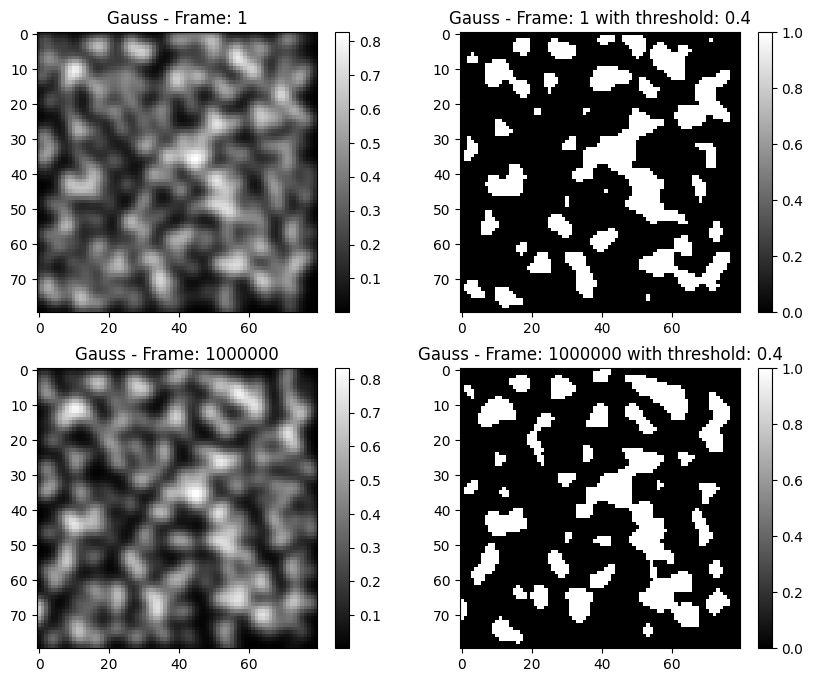

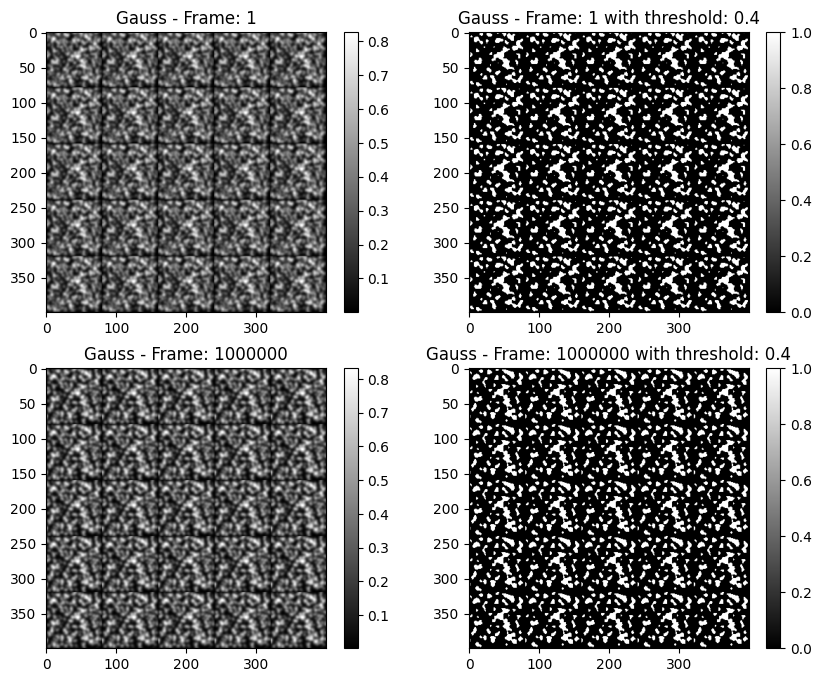

cells start 850 Cells end: 850
end area fraction ours: 0.22890625


In [9]:
#image stuff:

def process_our_image(img):
  #need to smooth?
  #remove boarder?
  return label(img)

L= 50

if post_process:
  #apply threshold:
  threshold = 0.4

  wanted_image_size = np.array([400,400]) #video size
  scaled_img_size = np.array([box_size[0]/100,box_size[1]/100]) #1 pixel in original video is 100 nm

  dupX = int(wanted_image_size[1]/scaled_img_size[1])
  dupY = int(wanted_image_size[0]/scaled_img_size[0])
  print(dupX,dupY)

  image_frames = [resize(i,scaled_img_size) for i in imgs_fill_smooth]
  image_frames_duplicated = [i32.duplicate_image(img,dupX,dupY) for img in image_frames]

  th_imgs = []


  plt.figure(figsize=(10,4*len(image_frames)))
  for i,img in enumerate(image_frames):

    _frame_val = frames[i] #this conversion probably works best for first and last frame (may need the verify)
    if frames[i] == 0:
      _frame_val = 1
    else:
      _frame_val = (_frame_val + 1) * skip_frames

    plt.subplot(len(imgs_fill),2,(i)*2+1)
    plt.title(f"Gauss - Frame: {_frame_val}")
    plt.imshow(img,cmap="gray")

    im_ratio = img.shape[0]/img.shape[1]
    plt.colorbar(fraction=0.045 * im_ratio)

    plt.subplot(len(imgs_fill),2,(i)*2+2)
    plt.title(f"Gauss - Frame: {_frame_val} with threshold: {threshold}")
    _img_gauss_th = np.where(img > threshold,1,0)
    plt.imshow(_img_gauss_th,cmap="gray")
    plt.colorbar(fraction=0.045 * im_ratio)

  plt.show()



  plt.figure(figsize=(10,4*len(image_frames)))
  for i,img in enumerate(image_frames_duplicated):#enumerate(image_frames):

    _frame_val = frames[i] #this conversion probably works best for first and last frame (may need the verify)
    if frames[i] == 0:
      _frame_val = 1
    else:
      _frame_val = (_frame_val + 1) * skip_frames

    plt.subplot(len(imgs_fill),2,(i)*2+1)
    plt.title(f"Gauss - Frame: {_frame_val}")
    plt.imshow(img,cmap="gray")

    im_ratio = img.shape[0]/img.shape[1]
    plt.colorbar(fraction=0.045 * im_ratio)

    plt.subplot(len(imgs_fill),2,(i)*2+2)
    plt.title(f"Gauss - Frame: {_frame_val} with threshold: {threshold}")
    _img_gauss_th = np.where(img > threshold,1,0)
    plt.imshow(_img_gauss_th,cmap="gray")
    plt.colorbar(fraction=0.045 * im_ratio)

    th_imgs.append(_img_gauss_th)
  plt.show()

  #apply connected components
  cc_imgs = [process_our_image(i) for i in th_imgs]

  print("cells start",max(np.unique(cc_imgs[0])), "Cells end:", max(np.unique(cc_imgs[-1])))
  print("end area fraction ours:", np.sum(np.where(cc_imgs[-1]> 0, 1, 0)) / (400*400))

  F_list, G_list = vf.analyse_video(cc_imgs,L=L)

## Our RSM

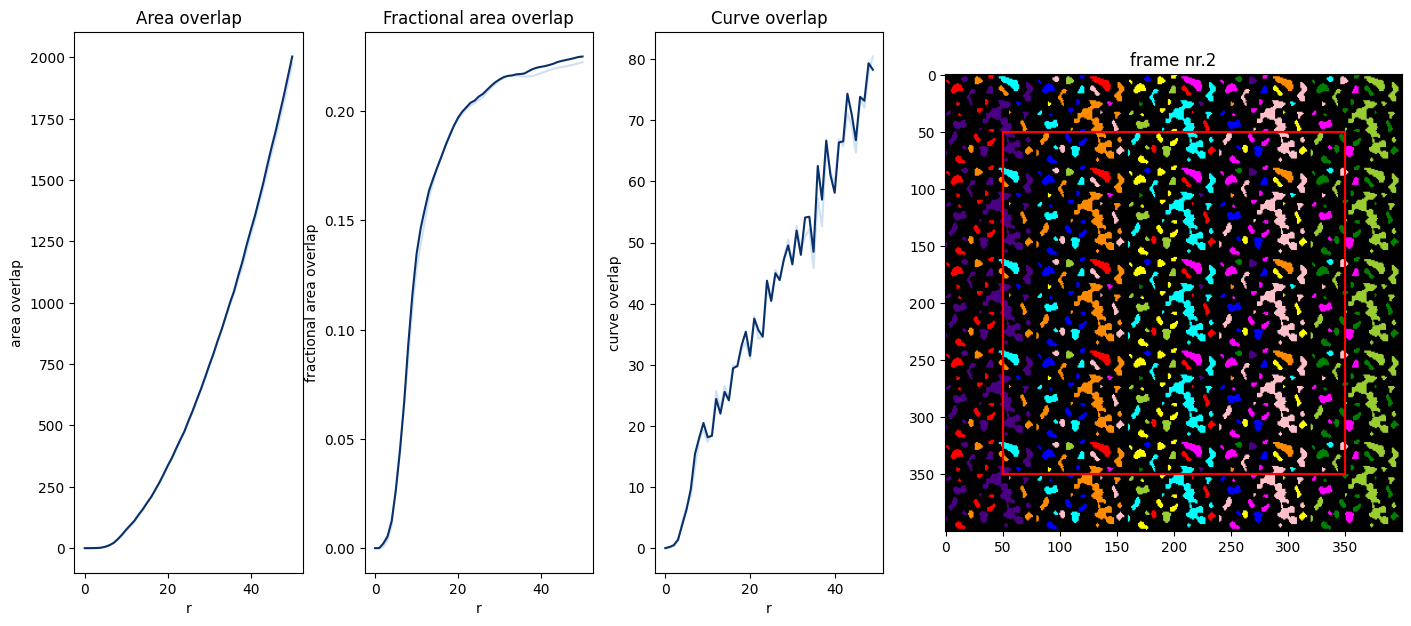

In [10]:
#our video
if rsm:
  vf.visualize(cc_imgs,F_list,G_list, save=False,L=L)

## Video and RSM

In [11]:
#info from the video:
threshold2 = 0.3
smooth = 1
skip_size = 24
#L= 50
size = int(wanted_image_size[0])

if video:
  frames_240= vf.process_video(vf.VIDEO_PATH,threshold=threshold2,smooth=smooth,skip_size=skip_size,size=size)
  used_frame = frames_240[:7]

  F_list2, G_list2 = vf.analyse_video(used_frame,L=L)

  #frames_240= vf.process_video(vf.VIDEO_PATH,threshold=threshold,smooth=smooth,skip_size=skip_size,size=size)
  print(len(frames_240))
  print(np.sum(np.where(cc_imgs[-1]> 0, 1, 0)) / (400*400)) #area of ours
  print(np.sum(np.where(used_frame[-1]> 0, 1, 0)) / (400*400)) #area of video

10
0.22890625
0.0636125


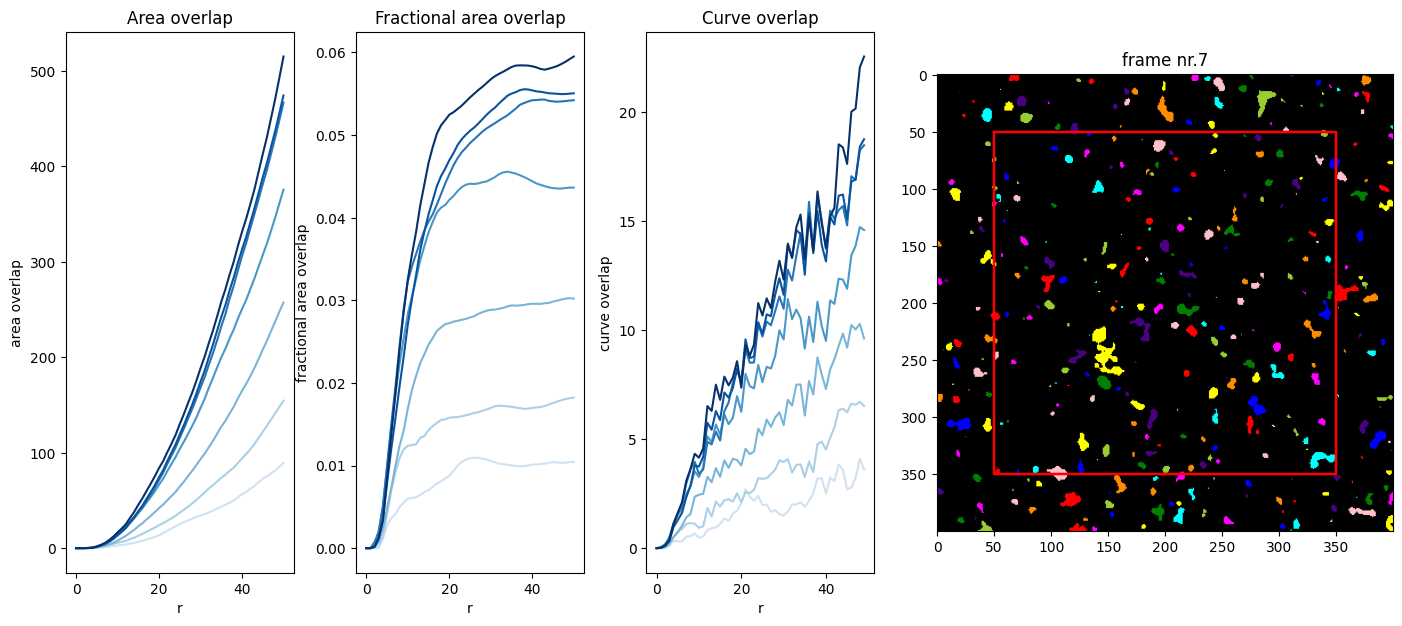

In [12]:
#actual video
if video:
  vf.visualize(used_frame,F_list2,G_list2,L=L)